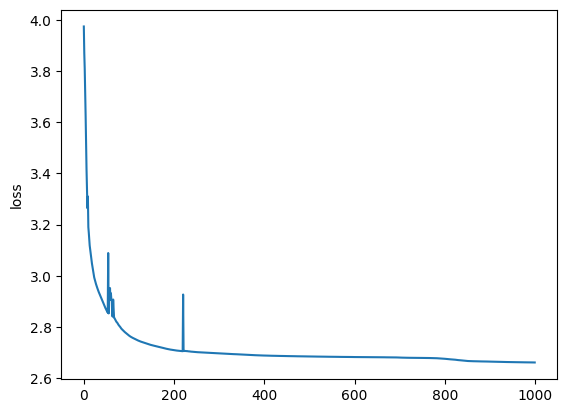

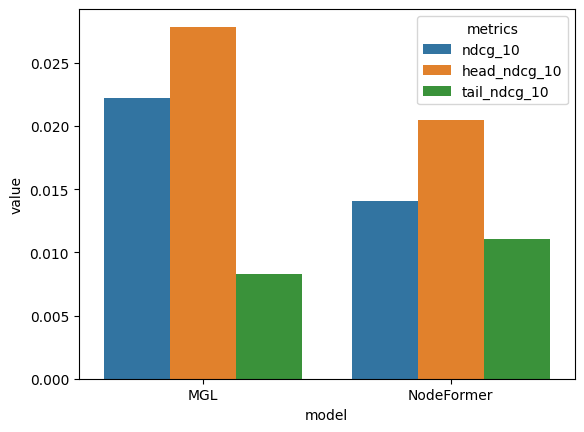

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

loss = []
ndcg_10 = []
head_ndcg_10 = []
tail_ndcg_10 = []
with open('results.txt', 'r') as f:
    lines = f.readlines()
    data = [line.split() for line in lines]

    for d in data:
        loss_sr = d[3].split(',')[0]
        ndcg_10_sr = d[7].split(',')[0]
        head_ndcg_10_sr = d[9].split(',')[0]
        tail_ndcg_10_sr = d[11]

        loss.append(loss_sr)
        ndcg_10.append(ndcg_10_sr)
        head_ndcg_10.append(head_ndcg_10_sr)
        tail_ndcg_10.append(tail_ndcg_10_sr)

df = pd.DataFrame({'loss': loss, 'ndcg_10': ndcg_10, 'head_ndcg_10': head_ndcg_10, 'tail_ndcg_10': tail_ndcg_10}) # NodeFormer
df = df.astype(float)
dic_mgl = {'ndcg_10': 0.022200825950180185, 'head_ndcg_10': 0.02785614143461878, 'tail_ndcg_10': 0.008323944349888507} # MGL
dic_nodeformer = {'ndcg_10': np.mean(df['ndcg_10']), 'head_ndcg_10': np.mean(df['head_ndcg_10']), 'tail_ndcg_10': np.mean(df['tail_ndcg_10'])} # NodeFormer

# plot
sns.lineplot(data=df['loss'])
plt.show()

# plot barplot for ndcg_10, head_ndcg_10, tail_ndcg_10 in MGL and NodeFormer in one figure
df_mgl = pd.DataFrame(dic_mgl, index=[0])
df_nodeformer = pd.DataFrame(dic_nodeformer, index=[0])
df_mgl['model'] = 'MGL'
df_nodeformer['model'] = 'NodeFormer'
df = pd.concat([df_mgl, df_nodeformer])
df = df.melt('model', var_name='metrics', value_name='value')
sns.barplot(x='model', y='value', hue='metrics', data=df)
plt.show()